In [112]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
import matplotlib.pyplot as plt

import the data 


In [ ]:
df= pd.re

In [82]:
df= pd.read_csv(r"C:\Users\asuss\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


check the null values 

In [ ]:
df.isnull().sum()

overall statics of the data 

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


change zero values in our data with NAN  and take a copy of our data 

In [24]:
df_copy= df.copy(deep=True) #by using deep=True in the copy() method, we ensure that any changes made to df_copy will not affect the original df object.

In [16]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


check the  null vallues again

In [23]:
df_copy.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

replace zero value with mean

In [26]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())


<AxesSubplot:>

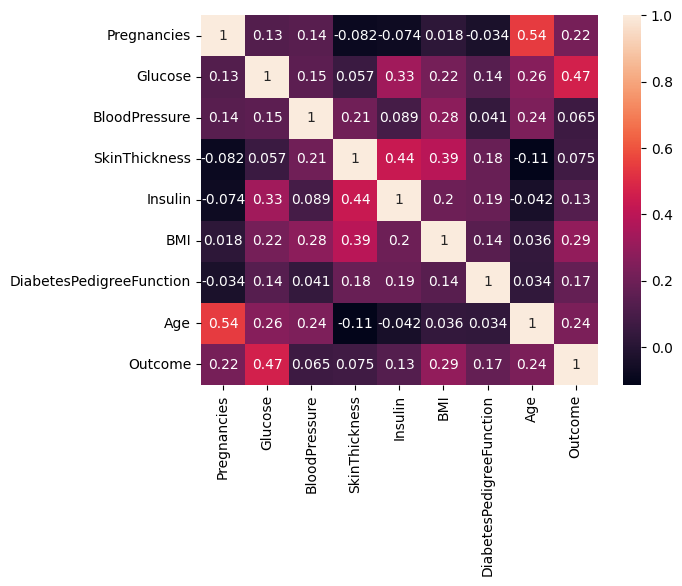

In [108]:
corr_mat=df.corr()
sns.heatmap(data=corr_mat,annot=True)

<AxesSubplot:>

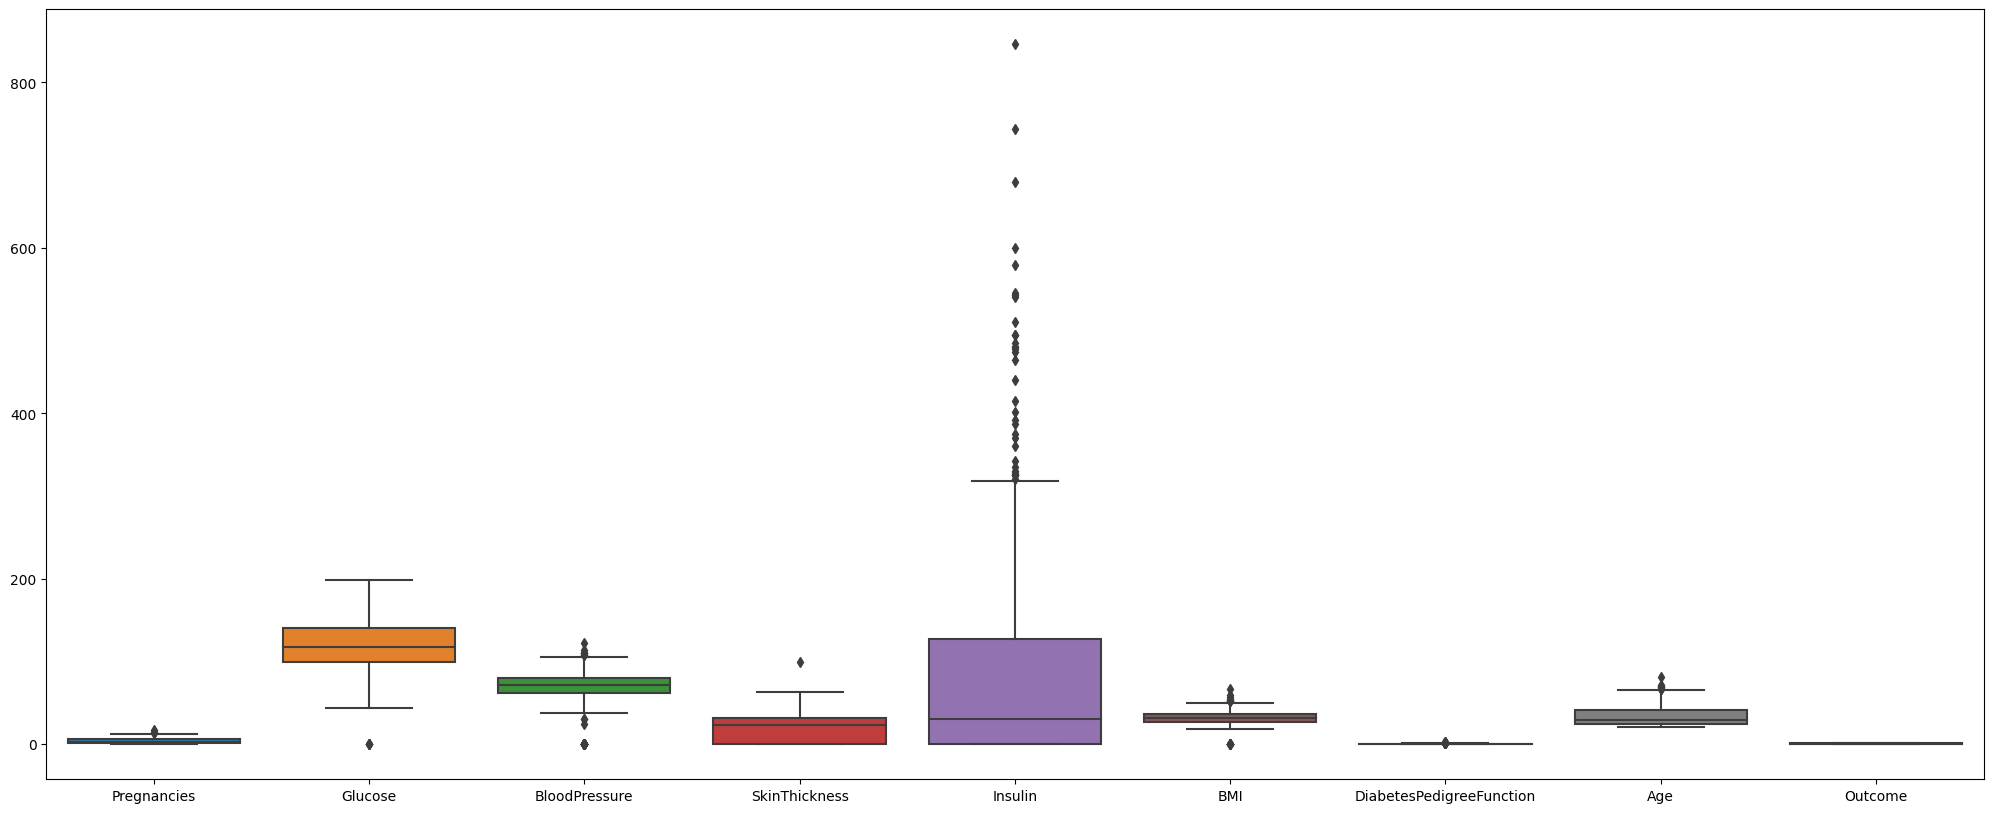

In [116]:

fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=df)

split data into feature and vector matrix 

In [29]:
X=df.drop(columns="Outcome")
y=df["Outcome"]

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


split data into training and test sets 

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

sklearn pipline

In [72]:
pipline_lr=Pipeline([("scalr1",StandardScaler()),("lr_classifire",LogisticRegression())])
pipline_knn=Pipeline([("scalr2",StandardScaler()),("knn_classifire",KNeighborsClassifier())])
pipline_svc=Pipeline([("scalr3",StandardScaler()),("svc_classifire",SVC())])

pipline_dt=Pipeline([("dt_classifire",DecisionTreeClassifier())])
pipline_rf=Pipeline([("rf_classifire",RandomForestClassifier(max_depth=3))])
pipline_gbc=Pipeline([("gbc_classifire",GradientBoostingClassifier())])

In [73]:
all_pip_lines=[pipline_lr,pipline_knn,pipline_svc,pipline_dt,pipline_rf,pipline_gbc]
all_pip_lines

[Pipeline(steps=[('scalr1', StandardScaler()),
                 ('lr_classifire', LogisticRegression())]),
 Pipeline(steps=[('scalr2', StandardScaler()),
                 ('knn_classifire', KNeighborsClassifier())]),
 Pipeline(steps=[('scalr3', StandardScaler()), ('svc_classifire', SVC())]),
 Pipeline(steps=[('dt_classifire', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifire', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifire', GradientBoostingClassifier())])]

In [74]:
for pip in all_pip_lines:
 pip.fit(x_train,y_train)

In [75]:
pip_dict={

    0:"lr",
    1:"knn",
    2:"svc",
    3:"dt",
    4:"rf",
    5:"gbc"
}

In [76]:
for i , model in enumerate(all_pip_lines):
    print("{} test accurcy:{}".format(pip_dict[i],model.score(x_test,y_test)*100))

lr test accurcy:76.62337662337663
knn test accurcy:76.62337662337663
svc test accurcy:73.37662337662337
dt test accurcy:72.72727272727273
rf test accurcy:79.22077922077922
gbc test accurcy:75.97402597402598


no we can use the random forest clasifier as it has the highest accuracy

In [ ]:
 from sklearn.ensemble import RandomForestClassifier 

In [79]:
rf= RandomForestClassifier(max_depth=3)

In [80]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


predict now on a new data 

In [99]:
new_df=pd.DataFrame({

    "Pregnancies":4,
    "Glucose":120,
    "BloodPressure":155,
    "SkinThickness":35,
    "Insulin":120,
    "BMI":70,
    "DiabetesPedigreeFunction":2.5,
    "Age":28

},index=[0])

In [101]:
rf.predict(new_df)

array([0], dtype=int64)